<a href="https://www.kaggle.com/code/rafaeldsn/amazon-books-data-wrangling-eda?scriptVersionId=125938693" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

<h1 style="font-size:3em"><b>Amazon Books - Data Wrangling + EDA</b></h1>

<p style="font-size:1.5em">The analysis below was made with the <a href= "https://www.kaggle.com/datasets/mohamedbakhet/amazon-books-reviews">Amazon Books Reviews</a> dataset.</p>

<p style="font-size:2em">List of Contents</p>

<ul>
    <a href="#data-wrangling"><li>Data Wrangling</li></a>
    <a href="#eda"><li>Exploratory Data Analysis</li></a>
<!--     <a href=""><li></li></a>
    <a href=""><li></li></a>
 -->



</ul>


<a id="data-wrangling"></a>
# 1. Data Wrangling

In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from pandasql import sqldf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading Data
books_data = pd.read_csv('../input/amazon-books-reviews/books_data.csv')
books_rating = pd.read_csv('/kaggle/input/amazon-books-reviews/Books_rating.csv')

In [3]:
# Checking columns in dataset
print(books_data.columns)
print(books_rating.columns)

Index(['Title', 'description', 'authors', 'image', 'previewLink', 'publisher',
       'publishedDate', 'infoLink', 'categories', 'ratingsCount'],
      dtype='object')
Index(['Id', 'Title', 'Price', 'User_id', 'profileName', 'review/helpfulness',
       'review/score', 'review/time', 'review/summary', 'review/text'],
      dtype='object')


In [4]:
# Removing unnecessary columns for the analysis
bd = books_data.drop(["description", "image", "previewLink", "publisher", "infoLink", "ratingsCount"], axis = 1)
br = books_rating.drop(["profileName","review/time", "review/helpfulness", "review/summary", "review/text", "User_id"], axis = 1)

print(bd.columns)
print(br.columns)

Index(['Title', 'authors', 'publishedDate', 'categories'], dtype='object')
Index(['Id', 'Title', 'Price', 'review/score'], dtype='object')


In [5]:
# Deleting Initial dataframes in order to reduce RAM usage
del books_data, books_rating

In [6]:
# Books data dataset
sqldf("SELECT * FROM bd LIMIT 10")

,Title,authors,publishedDate,categories
0,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels']
1,Dr. Seuss: American Icon,['Philip Nel'],2005-01-01,['Biography & Autobiography']
2,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion']
3,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction']
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],2003-03-01,None
5,The Church of Christ: A Biblical Ecclesiology ...,['Everett Ferguson'],1996,['Religion']
6,The Overbury affair (Avon),['Miriam Allen De Ford'],1960,None
7,A Walk in the Woods: a Play in Two Acts,['Lee Blessing'],1988,None
8,Saint Hyacinth of Poland,['Mary Fabyan Windeatt'],2009-01-01,['Biography & Autobiography']
9,Rising Sons and Daughters: Life Among Japan's ...,['Steven Wardell'],1995,['Social Science']


In [7]:
# Books reviews dataset
sqldf("SELECT * FROM br LIMIT 10")

,Id,Title,Price,review/score
0,1882931173,Its Only Art If Its Well Hung!,None,4.0
1,0826414346,Dr. Seuss: American Icon,None,5.0
2,0826414346,Dr. Seuss: American Icon,None,5.0
3,0826414346,Dr. Seuss: American Icon,None,4.0
4,0826414346,Dr. Seuss: American Icon,None,4.0
5,0826414346,Dr. Seuss: American Icon,None,4.0
6,0826414346,Dr. Seuss: American Icon,None,5.0
7,0826414346,Dr. Seuss: American Icon,None,5.0
8,0826414346,Dr. Seuss: American Icon,None,5.0
9,0826414346,Dr. Seuss: American Icon,None,4.0


In [8]:
# Renaming review column
br.rename(columns = {'review/score':'review'}, inplace = True)
print(br.columns)

Index(['Id', 'Title', 'Price', 'review'], dtype='object')


In [9]:
# Aggregating the price and review columns by the Id of the book
br_2 = sqldf("""SELECT Id, Title, AVG(Price) AS PRICE, AVG(review) AS REVIEW, Count(review) AS N_OF_REVIEWS 
                FROM br 
                GROUP BY Id""")

sqldf("SELECT * FROM br_2 LIMIT 15")

,Id,Title,PRICE,REVIEW,N_OF_REVIEWS
0,0001047604,Aurora Leigh,None,3.000000,4
1,0001047655,The Prodigal Daughter,None,3.716216,74
2,0001047736,Summer of the Danes,None,3.500000,12
3,0001047825,Potters Field Audio,None,3.857143,14
4,0001047876,Life of Samuel Johnson,None,4.000000,8
5,0001048228,Pale Battalions,None,4.333333,33
6,0001049143,The Poems & Songs of Robert Burns (HarperColli...,None,4.363636,11
7,0001050079,Copperhead (The Starbuck Chronicles),None,4.153846,26
8,0001050087,Battle Flag (Starbuck Chronicles),None,3.964286,28
9,0001050184,"Not a Penny More, Not a Penny Less",None,4.268116,138


In [10]:
# Creating prefix to merge dataframes
bd_p = bd.add_prefix("bd_")
br_p = br_2.add_prefix("br_")

In [11]:
# Merge Dataframes
df = sqldf(""" SELECT bd_p.*, br_p.*
          FROM bd_p, br_p 
          WHERE bd_p.bd_Title = br_p.br_Title""")

df

,bd_Title,bd_authors,bd_publishedDate,bd_categories,br_Id,br_Title,br_PRICE,br_REVIEW,br_N_OF_REVIEWS
0,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels'],1882931173,Its Only Art If Its Well Hung!,NaN,4.000000,1
1,Dr. Seuss: American Icon,['Philip Nel'],2005-01-01,['Biography & Autobiography'],0826414346,Dr. Seuss: American Icon,NaN,4.555556,9
2,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion'],0829814000,Wonderful Worship in Smaller Churches,19.40,5.000000,4
3,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction'],0595344550,Whispers of the Wicked Saints,10.95,3.718750,32
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],2003-03-01,None,0253338352,"Nation Dance: Religion, Identity and Cultural ...",39.95,5.000000,1
...,...,...,...,...,...,...,...,...,...
221984,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],0590482467,The Orphan Of Ellis Island (Time Travel Advent...,3.32,4.678571,28
221985,Red Boots for Christmas,None,1995,['Juvenile Fiction'],0570047870,Red Boots for Christmas,NaN,5.000000,2
221986,Mamaw,['Wild Wild Cabbage'],2018-01-17,None,B000OVF7JY,Mamaw,NaN,4.666667,3
221987,The Autograph Man,['Zadie Smith'],2003-08-12,['Fiction'],1402508735,The Autograph Man,34.99,2.500000,4


In [12]:
#Rearranging and deleting duplicated columns
df.columns

Index(['bd_Title', 'bd_authors', 'bd_publishedDate', 'bd_categories', 'br_Id',
       'br_Title', 'br_PRICE', 'br_REVIEW', 'br_N_OF_REVIEWS'],
      dtype='object')

In [13]:
del df["br_Title"]
df

,bd_Title,bd_authors,bd_publishedDate,bd_categories,br_Id,br_PRICE,br_REVIEW,br_N_OF_REVIEWS
0,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels'],1882931173,NaN,4.000000,1
1,Dr. Seuss: American Icon,['Philip Nel'],2005-01-01,['Biography & Autobiography'],0826414346,NaN,4.555556,9
2,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion'],0829814000,19.40,5.000000,4
3,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction'],0595344550,10.95,3.718750,32
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],2003-03-01,None,0253338352,39.95,5.000000,1
...,...,...,...,...,...,...,...,...
221984,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],0590482467,3.32,4.678571,28
221985,Red Boots for Christmas,None,1995,['Juvenile Fiction'],0570047870,NaN,5.000000,2
221986,Mamaw,['Wild Wild Cabbage'],2018-01-17,None,B000OVF7JY,NaN,4.666667,3
221987,The Autograph Man,['Zadie Smith'],2003-08-12,['Fiction'],1402508735,34.99,2.500000,4


In [14]:
# Name of Columns
df.columns

Index(['bd_Title', 'bd_authors', 'bd_publishedDate', 'bd_categories', 'br_Id',
       'br_PRICE', 'br_REVIEW', 'br_N_OF_REVIEWS'],
      dtype='object')

In [15]:
# Renaming Columns
df.columns = ['Title', 'Authors', 'Published_Date', 'Categorie', 'Id', 'Price', 'Review', 'n_Reviews']
df

,Title,Authors,Published_Date,Categorie,Id,Price,Review,n_Reviews
0,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels'],1882931173,NaN,4.000000,1
1,Dr. Seuss: American Icon,['Philip Nel'],2005-01-01,['Biography & Autobiography'],0826414346,NaN,4.555556,9
2,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion'],0829814000,19.40,5.000000,4
3,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction'],0595344550,10.95,3.718750,32
4,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],2003-03-01,None,0253338352,39.95,5.000000,1
...,...,...,...,...,...,...,...,...
221984,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],0590482467,3.32,4.678571,28
221985,Red Boots for Christmas,None,1995,['Juvenile Fiction'],0570047870,NaN,5.000000,2
221986,Mamaw,['Wild Wild Cabbage'],2018-01-17,None,B000OVF7JY,NaN,4.666667,3
221987,The Autograph Man,['Zadie Smith'],2003-08-12,['Fiction'],1402508735,34.99,2.500000,4


In [16]:
# Rearranging Columns
df = df[['Id', 'Title', 'Authors', 'Published_Date', 'Categorie', 'Price', 'Review', 'n_Reviews']]
df

,Id,Title,Authors,Published_Date,Categorie,Price,Review,n_Reviews
0,1882931173,Its Only Art If Its Well Hung!,['Julie Strain'],1996,['Comics & Graphic Novels'],NaN,4.000000,1
1,0826414346,Dr. Seuss: American Icon,['Philip Nel'],2005-01-01,['Biography & Autobiography'],NaN,4.555556,9
2,0829814000,Wonderful Worship in Smaller Churches,['David R. Ray'],2000,['Religion'],19.40,5.000000,4
3,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction'],10.95,3.718750,32
4,0253338352,"Nation Dance: Religion, Identity and Cultural ...",['Edward Long'],2003-03-01,None,39.95,5.000000,1
...,...,...,...,...,...,...,...,...
221984,0590482467,The Orphan Of Ellis Island (Time Travel Advent...,['Elvira Woodruff'],2000-06-01,['Juvenile Fiction'],3.32,4.678571,28
221985,0570047870,Red Boots for Christmas,None,1995,['Juvenile Fiction'],NaN,5.000000,2
221986,B000OVF7JY,Mamaw,['Wild Wild Cabbage'],2018-01-17,None,NaN,4.666667,3
221987,1402508735,The Autograph Man,['Zadie Smith'],2003-08-12,['Fiction'],34.99,2.500000,4


<p style="font-size:1.5em"> The columns with NaN/None values will be discarded. </p>
<p style="font-size:1.5em"> In order to analyse only the books with more relevance, only the books with at least 5 reviews will be considered.</p>


In [17]:
# Removing Nan/None Values
df.dropna(inplace=True)

# Filtering the columns with at least 5 reviews
df = sqldf("""  SELECT * 
                FROM df 
                WHERE n_Reviews >= 5""")
df

,Id,Title,Authors,Published_Date,Categorie,Price,Review,n_Reviews
0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],2005-02,['Fiction'],10.95,3.718750,32
1,0918973031,Dramatica for Screenwriters,['Armando Salda A-Mora'],2005-07,['Reference'],17.95,4.700000,10
2,0792391810,Vector Quantization and Signal Compression (Th...,"['Allen Gersho', 'Robert M. Gray']",2012-12-06,['Technology & Engineering'],76.94,4.400000,5
3,0974289108,The Ultimate Guide to Law School Admission: In...,['Fiona Cownie'],2010-01-28,['Law'],14.95,3.571429,7
4,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],2005,['Foreign Language Study'],19.77,3.800000,5
...,...,...,...,...,...,...,...,...
16414,0875802796,In the First Line of Battle: The 12th Illinois...,['Samuel M. Blackwell'],2002,['History'],38.50,4.600000,5
16415,1582461031,Petit Connoisseur: Art,['Karen Salmansohn'],2003,['Juvenile Nonfiction'],6.99,4.142857,7
16416,0679783334,The Awakening and Selected Stories (Modern Lib...,['Kate Chopin'],2003,['Adultery'],9.00,3.000000,7
16417,0971556504,The Magic of the Soul: Applying Spiritual Powe...,['Patrick J. Harbula'],2002-09-01,"['Body, Mind & Spirit']",18.95,4.882353,17


In [18]:
# Taking only the year as the book's published date
df['Year'] = df['Published_Date'].str[:4]

# Removing Published_Date column 
df = df[['Id', 'Title', 'Authors', 'Year', 'Categorie', 'Price', 'Review', 'n_Reviews']]
df

,Id,Title,Authors,Year,Categorie,Price,Review,n_Reviews
0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],2005,['Fiction'],10.95,3.718750,32
1,0918973031,Dramatica for Screenwriters,['Armando Salda A-Mora'],2005,['Reference'],17.95,4.700000,10
2,0792391810,Vector Quantization and Signal Compression (Th...,"['Allen Gersho', 'Robert M. Gray']",2012,['Technology & Engineering'],76.94,4.400000,5
3,0974289108,The Ultimate Guide to Law School Admission: In...,['Fiona Cownie'],2010,['Law'],14.95,3.571429,7
4,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],2005,['Foreign Language Study'],19.77,3.800000,5
...,...,...,...,...,...,...,...,...
16414,0875802796,In the First Line of Battle: The 12th Illinois...,['Samuel M. Blackwell'],2002,['History'],38.50,4.600000,5
16415,1582461031,Petit Connoisseur: Art,['Karen Salmansohn'],2003,['Juvenile Nonfiction'],6.99,4.142857,7
16416,0679783334,The Awakening and Selected Stories (Modern Lib...,['Kate Chopin'],2003,['Adultery'],9.00,3.000000,7
16417,0971556504,The Magic of the Soul: Applying Spiritual Powe...,['Patrick J. Harbula'],2002,"['Body, Mind & Spirit']",18.95,4.882353,17


In [19]:
# Analysing the Unique Values of Column Year
np.sort(df['Year'].unique())

array(['1722', '1802', '1817', '1822', '1823', '1843', '1852', '1853',
       '1863', '1870', '1871', '1872', '1875', '1877', '1878', '1883',
       '1884', '1885', '1887', '1888', '1889', '1891', '1894', '1895',
       '1897', '1900', '1901', '1903', '1904', '1906', '1907', '1908',
       '1909', '1910', '1912', '1913', '1914', '1915', '1916', '1918',
       '1919', '1920', '1921', '1922', '1925', '1926', '1927', '1929',
       '1930', '1937', '1940', '1941', '1942', '1943', '1945', '1946',
       '1947', '1948', '1949', '1950', '1952', '1953', '1954', '1955',
       '1956', '1957', '1958', '1959', '1960', '1961', '1962', '1963',
       '1964', '1965', '1966', '1967', '1968', '1969', '196?', '1970',
       '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994',
       '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002',
      

In [20]:
# Ocurrencies of ? in the year column
df.loc[df['Year'].str.contains("[?]",case=False)]

,Id,Title,Authors,Year,Categorie,Price,Review,n_Reviews
10144,1592248810,The Damned,['Charles Fort'],196?,['Science'],13.95,3.500000,6
11172,0977103102,Bagpipe Maintenance Book,['Michael Hamilton'],200?,['Bagpipe'],8.00,3.666667,6


<p style="font-size:1.5em">There are ocurrencies of '?' in the year column, so it will be replaced by the number 5</p>

In [21]:
# Replacing ? by 5
df['Year'] = df['Year'].str.replace('?', '5', regex=False)

# Converting Year to integer
df['Year'] = df['Year'].astype('int')

In [22]:
np.sort(df['Year'].unique())

array([1722, 1802, 1817, 1822, 1823, 1843, 1852, 1853, 1863, 1870, 1871,
       1872, 1875, 1877, 1878, 1883, 1884, 1885, 1887, 1888, 1889, 1891,
       1894, 1895, 1897, 1900, 1901, 1903, 1904, 1906, 1907, 1908, 1909,
       1910, 1912, 1913, 1914, 1915, 1916, 1918, 1919, 1920, 1921, 1922,
       1925, 1926, 1927, 1929, 1930, 1937, 1940, 1941, 1942, 1943, 1945,
       1946, 1947, 1948, 1949, 1950, 1952, 1953, 1954, 1955, 1956, 1957,
       1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968,
       1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979,
       1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023,
       2030])

In [23]:
# Books with published date above or equals 2023
df[df['Year']>=2023]

,Id,Title,Authors,Year,Categorie,Price,Review,n_Reviews
6896,1400032725,How the Universe Got Its Spots: Diary of a Fin...,['Janna Levin'],2023,['Science'],10.24,4.375000,32
7481,B000HXDKD4,A Wealth of Wisdom: Legendary African American...,"['Camille Cosby', 'Rene Poussaint']",2030,['Biography & Autobiography'],11.18,4.800000,5
9385,1885061897,Birds of New Jersey Field Guide,['Stan Tekiela'],2023,['Nature'],10.58,4.533333,15


<p style="font-size:1.5em"> In the analysis it will be considered only the books untill 2022 because that is the latest dateset update until February 2023.</p>

In [24]:
df = df[df['Year']<2023]
df.reset_index(inplace=True)
df_shape = df.shape
df_shape

(16416, 9)

<p style="font-size:1.2em"><i>* The columns <b>Categorie</b> and <b>Authors</b> are in a list format that need to be dealt separately, so they will be treated in the exploratory analysis at different points.</i></p>

<a id="eda"></a>
# 2. Exploratory Data Analysis

<p style="font-size:1.5em"> <b>Categorie column</b>: at first it will be checked the maximum number of categories in a book and later, if the maximum categories per book is 1, it will be converted to strings in a new dataframe .</p>

In [25]:
df_2 = df

# Convert the Strings in the Categorie Column to list.
df_2["Categorie"] = df_2["Categorie"].apply(eval)
df_2

,index,Id,Title,Authors,Year,Categorie,Price,Review,n_Reviews
0,0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],2005,[Fiction],10.95,3.718750,32
1,1,0918973031,Dramatica for Screenwriters,['Armando Salda A-Mora'],2005,[Reference],17.95,4.700000,10
2,2,0792391810,Vector Quantization and Signal Compression (Th...,"['Allen Gersho', 'Robert M. Gray']",2012,[Technology & Engineering],76.94,4.400000,5
3,3,0974289108,The Ultimate Guide to Law School Admission: In...,['Fiona Cownie'],2010,[Law],14.95,3.571429,7
4,4,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],2005,[Foreign Language Study],19.77,3.800000,5
...,...,...,...,...,...,...,...,...,...
16411,16414,0875802796,In the First Line of Battle: The 12th Illinois...,['Samuel M. Blackwell'],2002,[History],38.50,4.600000,5
16412,16415,1582461031,Petit Connoisseur: Art,['Karen Salmansohn'],2003,[Juvenile Nonfiction],6.99,4.142857,7
16413,16416,0679783334,The Awakening and Selected Stories (Modern Lib...,['Kate Chopin'],2003,[Adultery],9.00,3.000000,7
16414,16417,0971556504,The Magic of the Soul: Applying Spiritual Powe...,['Patrick J. Harbula'],2002,"[Body, Mind & Spirit]",18.95,4.882353,17


In [26]:
# Max Size of List in the Categorie column
max_cats = 0
for i in range(len(df_2)):
    if len(df_2.loc[i, 'Categorie'])>max_cats:
        max_cats = len(df_2.loc[i, 'Categorie'])
max_cats

1

<p style="font-size:1.5em">There are no books with more than one categorie, so the Categorie column can be modified to string as the code below</p>

In [27]:
df_2['Categorie'] = df_2['Categorie'].apply(''.join)
df_2

,index,Id,Title,Authors,Year,Categorie,Price,Review,n_Reviews
0,0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],2005,Fiction,10.95,3.718750,32
1,1,0918973031,Dramatica for Screenwriters,['Armando Salda A-Mora'],2005,Reference,17.95,4.700000,10
2,2,0792391810,Vector Quantization and Signal Compression (Th...,"['Allen Gersho', 'Robert M. Gray']",2012,Technology & Engineering,76.94,4.400000,5
3,3,0974289108,The Ultimate Guide to Law School Admission: In...,['Fiona Cownie'],2010,Law,14.95,3.571429,7
4,4,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],2005,Foreign Language Study,19.77,3.800000,5
...,...,...,...,...,...,...,...,...,...
16411,16414,0875802796,In the First Line of Battle: The 12th Illinois...,['Samuel M. Blackwell'],2002,History,38.50,4.600000,5
16412,16415,1582461031,Petit Connoisseur: Art,['Karen Salmansohn'],2003,Juvenile Nonfiction,6.99,4.142857,7
16413,16416,0679783334,The Awakening and Selected Stories (Modern Lib...,['Kate Chopin'],2003,Adultery,9.00,3.000000,7
16414,16417,0971556504,The Magic of the Soul: Applying Spiritual Powe...,['Patrick J. Harbula'],2002,"Body, Mind & Spirit",18.95,4.882353,17


In [28]:
# Verifying the categories column
df_2['Categorie'].value_counts()

Fiction                       2300
Religion                      1327
Computers                      832
History                        831
Business & Economics           825
                              ... 
High technology industries       1
Thai language                    1
Guinea pigs                      1
Displacement (Psychology)        1
Colombo (Sri Lanka)              1
Name: Categorie, Length: 938, dtype: int64

In [29]:
# Number of unique values
df_2['Categorie'].nunique()

938

<p style="font-size:1.5em">As we can see there are 938 unique categories, so it will be reduced in order to improve the analysis.</p>

In [30]:
# Top 30 Categories in Frequency
cats_30 = sqldf("SELECT Categorie, Count(Categorie) AS n FROM df GROUP BY Categorie ORDER BY n DESC LIMIT 30")
cats_30

,Categorie,n
0,Fiction,2300
1,Religion,1327
2,Computers,832
3,History,831
4,Business & Economics,825
5,Biography & Autobiography,749
6,Juvenile Fiction,731
7,Health & Fitness,441
8,"Body, Mind & Spirit",428
9,Family & Relationships,402


In [31]:
# Sum of the books in the top 30 categories
n_books_top30_cats = sqldf("SELECT SUM(n) FROM cats_30")
n_books_top30_cats

,SUM(n)
0,13430


In [32]:
# Percentage of books in the top 30 categories
perc_top_30 = "{:.1%}".format(n_books_top30_cats.iloc[0,0]/df_shape[0])
perc_top_30

'81.8%'

<p style="font-size:1.5em"> 81.8% of the books are in the top 30 categories, so the analysis will be made with only these </p>

In [33]:
# FILTERING THE DATASET 
# Number of books in the 30th most appeared categorie
n_30 = cats_30.iloc[29,1]

# Dateset with only the top 30 Categories
df_top_30 = df_2.groupby("Categorie").filter(lambda x: len(x)>=n_30)
df_top_30.reset_index(inplace=True)
df_top_30

,level_0,index,Id,Title,Authors,Year,Categorie,Price,Review,n_Reviews
0,0,0,0595344550,Whispers of the Wicked Saints,['Veronica Haddon'],2005,Fiction,10.95,3.718750,32
1,4,4,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),['Kayode J. Fakinlede'],2005,Foreign Language Study,19.77,3.800000,5
2,6,6,1861081162,Pyrography Designs,['Sue Walters'],2014,Art,13.19,4.250000,8
3,10,10,0394717953,America at 1750: A Social Portrait,['Richard Hofstadter'],1973,History,9.62,3.777778,9
4,11,11,1930429487,How to Discipline Kids without Losing Their Lo...,['Jim Fay'],2004,Family & Relationships,10.17,4.882353,17
...,...,...,...,...,...,...,...,...,...,...
13425,16410,16413,1878257447,Watercolor: For the Artistically Undiscovered ...,"['Thacher Hurd', 'John Cassidy']",2017,Art,19.95,4.588235,17
13426,16411,16414,0875802796,In the First Line of Battle: The 12th Illinois...,['Samuel M. Blackwell'],2002,History,38.50,4.600000,5
13427,16412,16415,1582461031,Petit Connoisseur: Art,['Karen Salmansohn'],2003,Juvenile Nonfiction,6.99,4.142857,7
13428,16414,16417,0971556504,The Magic of the Soul: Applying Spiritual Powe...,['Patrick J. Harbula'],2002,"Body, Mind & Spirit",18.95,4.882353,17


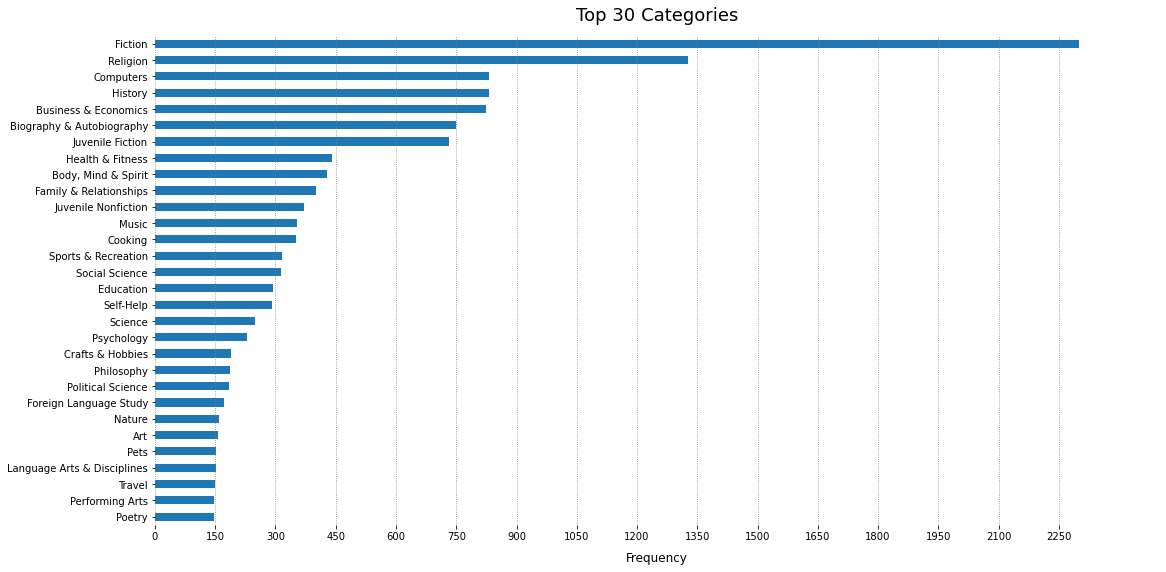

In [34]:
# Barplot with the Top 30 Categories
plt.figure(figsize=(18,9))
df_top_30['Categorie'].value_counts().sort_values().plot.barh()
plt.xlim(0,2500)
plt.grid(axis='x', color='grey', linestyle='dotted', linewidth=0.8)
plt.title("Top 30 Categories", fontdict={'fontsize':18}, pad = 15)
plt.xticks(ticks = (range(0,2400,150)))
plt.xlabel('Frequency',labelpad=10, fontsize=12)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

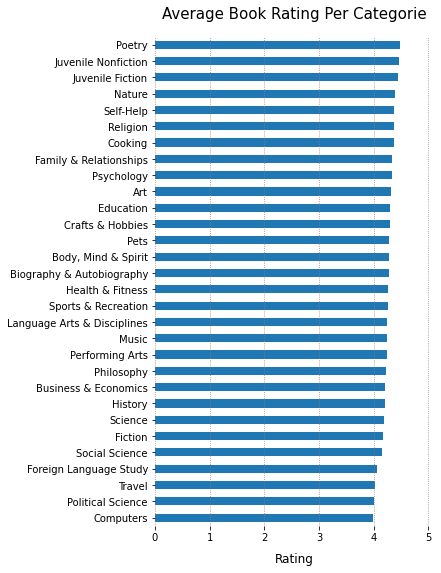

In [35]:
# RATING PER CATEGORIE

# AVERAGE RATING PER CATEGORIE
rat_per_cat = sqldf("SELECT Categorie, AVG(Review) AS rev_avg FROM df_top_30 GROUP BY Categorie ORDER BY rev_avg ASC")

plt.figure(figsize=(5,9))
rat_per_cat['rev_avg'].plot.barh()
plt.xlim(0,5.1)
plt.grid(axis='x', color='grey', linestyle='dotted', linewidth=0.8)
plt.xticks(ticks=range(0,6,1))
plt.xlabel('Rating',labelpad=10, fontsize=12)
plt.yticks(range(len(rat_per_cat['Categorie'])),rat_per_cat['Categorie'])
plt.title("Average Book Rating Per Categorie", fontdict={'fontsize':15}, pad=18)
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

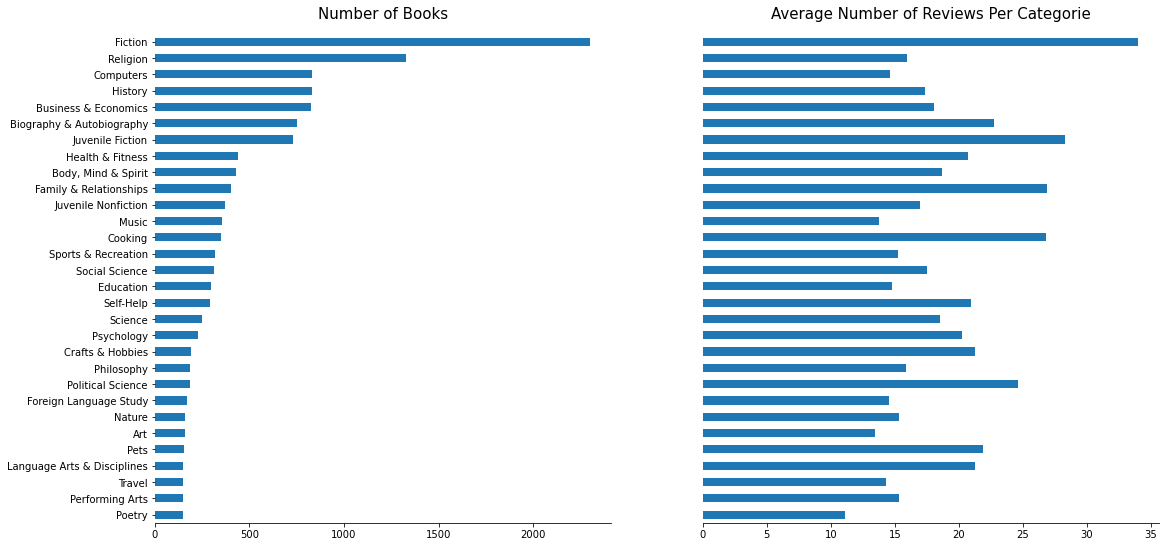

In [36]:
# CATEGORIE X NUMBER OF REVIEWS
# SEPARATE BETWEEN AVG AND TOTAL
df_n_review = sqldf(""" SELECT Categorie, AVG(n_reviews) AS avg_n_reviews, SUM(n_reviews) AS n_reviews,
                        COUNT(Categorie) AS n_books FROM df_top_30
                        GROUP BY Categorie ORDER BY n_books ASC""")

fig = plt.figure(figsize=(18, 9))

ax1 = fig.add_subplot(121)
df_top_30['Categorie'].value_counts().sort_values().plot.barh()
ax1.set_title('Number of Books', fontdict={'fontsize':15}, pad=15)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)

ax2 = fig.add_subplot(122)
df_n_review['avg_n_reviews'].plot.barh()
ax2.get_yaxis().set_visible(False)
ax2.set_title('Average Number of Reviews Per Categorie', fontdict={'fontsize':15}, pad=15)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax2.spines['left'].set_visible(False)

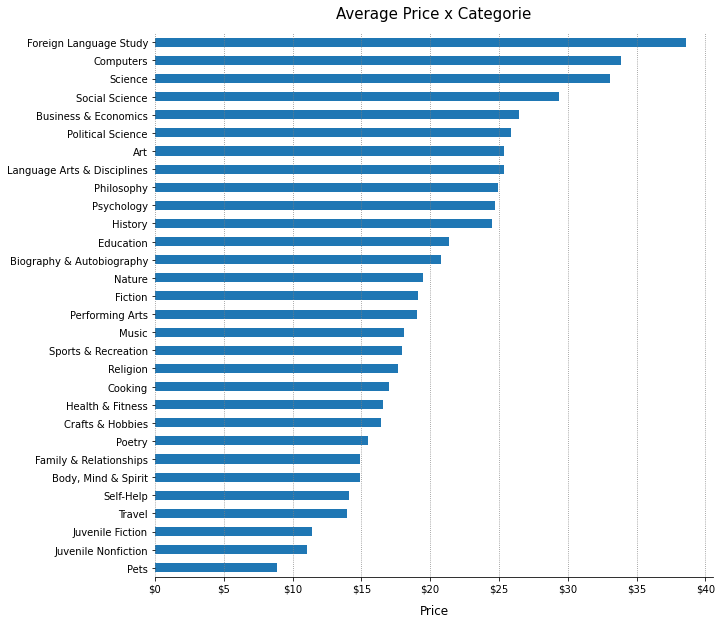

In [37]:
# PRICING PER CATEGORIE
avg_price_p_cat = sqldf("""SELECT Categorie, AVG(Price) AS avg_price FROM df_top_30 GROUP BY Categorie
                           ORDER BY avg_price ASC""")

fig = plt.figure(figsize=(10,10))

avg_price_p_cat['avg_price'].plot.barh()

plt.yticks(range(len(avg_price_p_cat['Categorie'])), avg_price_p_cat['Categorie'])
plt.grid(axis='x', color='grey', linestyle='dotted', linewidth=0.8)
plt.title('Average Price x Categorie', fontdict={'fontsize':15}, pad=15)
plt.xlabel('Price', fontsize=12, labelpad=10)


ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.set_major_formatter('${x:1.0f}')


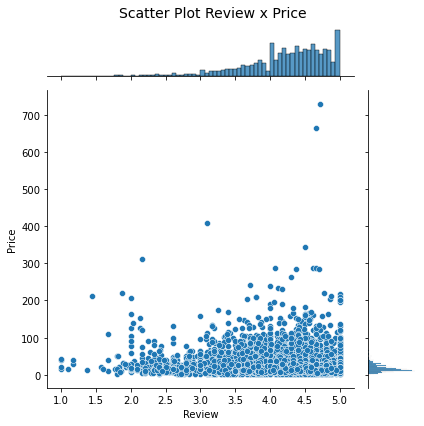

In [38]:
# SCATTER PLOT PRICE X REVIEW
p = sns.jointplot(x='Review', y='Price', data=df_top_30)
p.fig.suptitle("Scatter Plot Review x Price", fontsize=14)
p.fig.tight_layout()
p.fig.subplots_adjust(top=0.93)

[Text(0.5, 1.0, 'Review Distribution')]

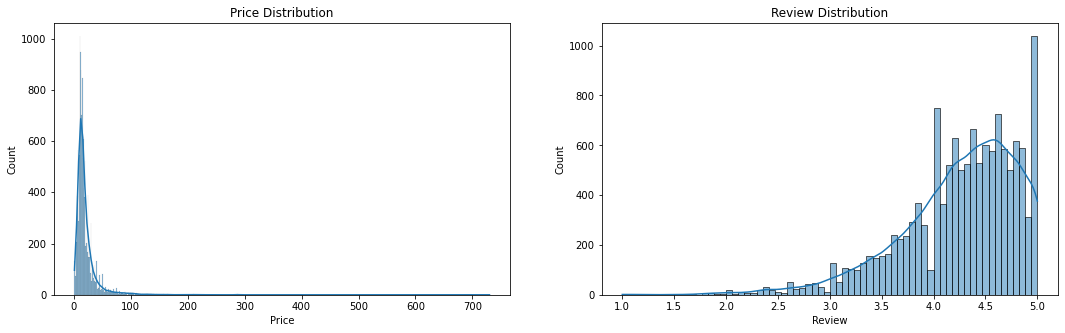

In [39]:
# Distribution of Price and  Review
plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
sns.histplot(df_top_30['Price'], kde=True).set(title='Price Distribution')
plt.subplot(1,2,2)
sns.histplot(df_top_30['Review'], kde= True).set(title='Review Distribution')

In [40]:
# Correlation between price and review
stats.pearsonr(df_top_30['Price'], df_top_30['Review'])


(-0.04993208269755525, 7.055601885722488e-09)

<p style="font-size:1.5em">As we can see there is no correlation between Price and Review.</p>

Text(0.5, 1.0, 'Frequency of Books Per Year')

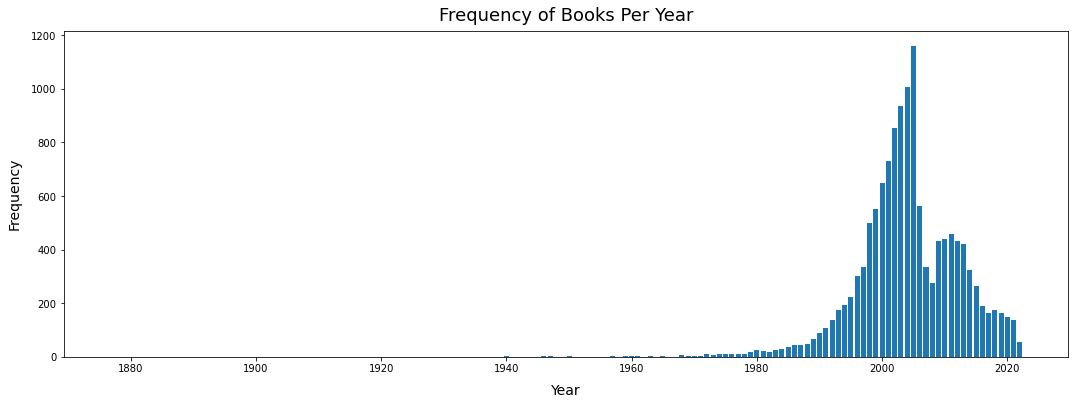

In [41]:
#DATE OF PUBLISHMENT
books_years = sqldf("""SELECT Year, Count(Id) AS n_books, AVG(Price) AS avg_price FROM df_top_30 GROUP BY Year ORDER BY Year DESC""")
fig = plt.figure(figsize=(18,6))
plt.bar(books_years['Year'], books_years['n_books'])
plt.xlabel('Year', labelpad=10,fontsize=14)
plt.ylabel('Frequency', labelpad=10,fontsize=14)
plt.title('Frequency of Books Per Year', fontdict={'fontsize': 18}, pad=10)


(0.0, 750.0)

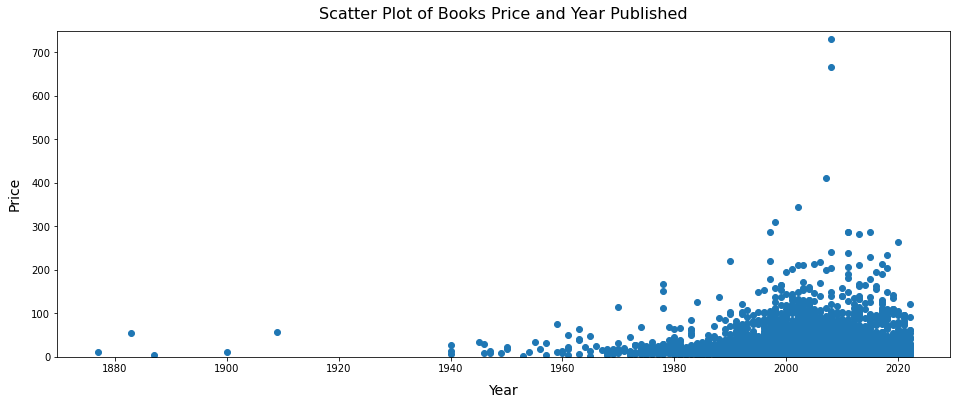

In [42]:
fig = plt.figure(figsize=(16,6))
plt.scatter(df_top_30['Year'], df_top_30['Price'])
plt.xlabel('Year', labelpad=10,fontsize=14)
plt.ylabel('Price', labelpad=10,fontsize=14)
plt.title('Scatter Plot of Books Price and Year Published', fontdict={'fontsize': 16}, pad=12)
plt.ylim([0,750])

<p style="font-size:1.5em">There are not many books before 1940, so the bar chart of average price for each year will only consider the year 1940 onwards.</p>

Text(0.5, 1.0, 'Year Published x Average Price of Books')

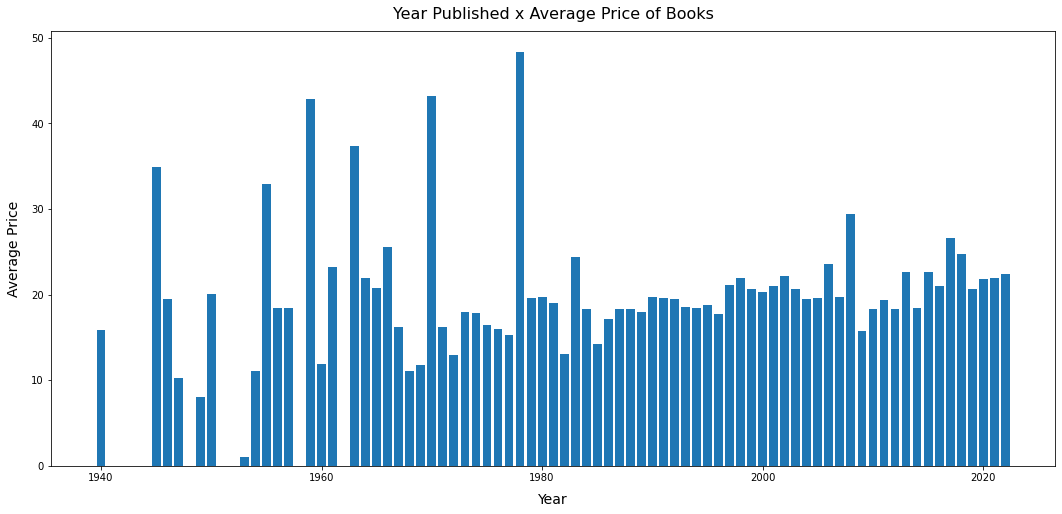

In [43]:
# YEAR OF THE BOOK AND AVERAGE PRICE - SCATTER PLOT
# The years selected for the average were from 1940 onwards
books_years_2 = sqldf(""" SELECT * FROM books_years WHERE Year>=1940""")
fig = plt.figure(figsize=(18,8))
plt.bar(books_years_2['Year'], books_years_2['avg_price'])
plt.xlabel('Year', labelpad=10,fontsize=14)
plt.ylabel('Average Price', labelpad=10,fontsize=14)
plt.title('Year Published x Average Price of Books', fontdict={'fontsize': 16}, pad=12)

<p style="font-size:1.5em"> <b>Authors column</b></p>

In [44]:
# New Dataset to separate the datasets before and after the treatment.
df_top_30_2 = df_top_30

In [45]:
# Apply eval in the author column and transforming the column data in lists
df_top_30_2["Authors"] = df_top_30_2["Authors"].apply(eval)

In [46]:
df_top_30_2

,level_0,index,Id,Title,Authors,Year,Categorie,Price,Review,n_Reviews
0,0,0,0595344550,Whispers of the Wicked Saints,[Veronica Haddon],2005,Fiction,10.95,3.718750,32
1,4,4,0781810698,Beginner's Yoruba (Hippocrene Beginner's Series),[Kayode J. Fakinlede],2005,Foreign Language Study,19.77,3.800000,5
2,6,6,1861081162,Pyrography Designs,[Sue Walters],2014,Art,13.19,4.250000,8
3,10,10,0394717953,America at 1750: A Social Portrait,[Richard Hofstadter],1973,History,9.62,3.777778,9
4,11,11,1930429487,How to Discipline Kids without Losing Their Lo...,[Jim Fay],2004,Family & Relationships,10.17,4.882353,17
...,...,...,...,...,...,...,...,...,...,...
13425,16410,16413,1878257447,Watercolor: For the Artistically Undiscovered ...,"[Thacher Hurd, John Cassidy]",2017,Art,19.95,4.588235,17
13426,16411,16414,0875802796,In the First Line of Battle: The 12th Illinois...,[Samuel M. Blackwell],2002,History,38.50,4.600000,5
13427,16412,16415,1582461031,Petit Connoisseur: Art,[Karen Salmansohn],2003,Juvenile Nonfiction,6.99,4.142857,7
13428,16414,16417,0971556504,The Magic of the Soul: Applying Spiritual Powe...,[Patrick J. Harbula],2002,"Body, Mind & Spirit",18.95,4.882353,17


In [47]:
# AUTHORS

# Max Size of List in the Categorie column
max_cats = 0
for i in range(len(df_top_30_2)):
    if len(df_top_30_2.loc[i, 'Authors'])>max_cats:
        max_cats = len(df_top_30_2.loc[i, 'Authors'])
max_cats

11

<p style="font-size:1.5em">There are books with more than one category. The approach chosen was reducing the dimensionality of the array containing the authors and converting the information needed to dictionaries. </p>

In [48]:
# FUNCTION TO REDUCE THE DIMENSION OF A 2D ARRAY
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])

<p style="font-size:1.5em"><b>Top 10 Authors with most books published </b></p>

In [49]:
# Top 10 Authors with most books published
books_per_author = to_1D(df_top_30_2["Authors"]).value_counts()
books_per_author_df = books_per_author.to_frame()
books_per_author_df.reset_index(inplace=True)
books_per_author_df.columns = ["Author", "Number_of_Books"]
books_per_author_df.index = [x for x in range(1, len(books_per_author_df.values)+1)]
books_per_author_df.sort_values(by='Number_of_Books',ascending = False, inplace=True)
books_per_author_df.head(10)

,Author,Number_of_Books
1,John MacArthur,15
2,Pimsleur,13
3,Jwing-Ming Yang,12
4,Catherine Coulter,12
5,Hal Leonard Publishing Corporation,11
6,Anne McCaffrey,11
7,Elizabeth Clare Prophet,10
8,Stephanie Laurens,10
10,Jerry B. Jenkins,9
11,Kenneth Wapnick,9


<p style="font-size:1.5em">For the ratings analysis it will be considered only the authors with at least 5 books published. </p>

In [50]:
books_per_author_df = sqldf("""SELECT * from books_per_author_df
                                WHERE Number_of_Books>=5""")


<p style="font-size:1.5em"><b>Top 10 Best Rated Authors</b></p>

In [51]:
# Converting the books per author dataset in a dictionary
authors_dict={}
for i in range(len(books_per_author_df)):
    authors_dict[books_per_author_df['Author'][i]] = books_per_author_df['Number_of_Books'][i]
       
# Creation of a dictionary with the authors and each average rating
avg_rating_author_dict = {}

for key in authors_dict:
    aux_list = []
    
    for i in range(len(df_top_30_2)):
        authors_list = df_top_30_2['Authors'][i]
        if key in authors_list:
            aux_list.append(df_top_30_2['Review'][i])
    
    avg_rating_author_dict[key]=sum(aux_list)/len(aux_list)
    
# Sorting, converting the dictionary to dataframe and displaying the result
sorted_ratings_authors = sorted(avg_rating_author_dict.items(), key=lambda x:x[1], reverse=True)
ratings_authors_sorted = dict(sorted_ratings_authors) 
df_ratings_authors = pd.DataFrame.from_dict(ratings_authors_sorted, orient='index')
df_ratings_authors.reset_index(inplace=True)
df_ratings_authors.columns = ["Author", "Average_Rating"]
df_ratings_authors.index = [x for x in range(1, len(df_ratings_authors.values)+1)]
df_ratings_authors.head(10)

,Author,Average_Rating
1,Tom Tierney,4.807081
2,Cynthia Rylant,4.804793
3,Bob Sorge,4.763095
4,Mary Pope Osborne,4.711363
5,Donald Stokes,4.686179
6,Lillian Stokes,4.686179
7,Sandra Boynton,4.664170
8,Kumon Publishing,4.656560
9,Patricia Polacco,4.653543
10,William Barclay,4.643660
